# WeatherPy
1)  The plots showcasing the latitudes vs the maximum temperatures with the regression lines show that it is possible to predict temperatures based on latitudes. Temperatures rise as the latitudes reach the equator (0). The northern hemisphere shows a negative regression due to the fact the temperatures drop moving away from the equator.  
2) The plots showcasing humidity tends to show that humidity is not relative to latitudes as one might expect. The r-squared value is very low, leading to the conclusion the value of humidity cannot be predicted based on location of the city.  
3) Similiarly the plots showcasing cloudiness also have a low r-squared value. The location of the city also cannot predict the value of cloudiness.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

625


### API Calls
* Perform a weather check on each city using a series of successive API calls
* Print log of each city as it's being processed


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found... Skipping.")

Processing record 1|eureka
Processing record 2|taoudenni
Processing record 3|komsomolskiy
Processing record 4|george
Processing record 5|ushuaia
Processing record 6|majene
Processing record 7|nome
City not found... Skipping.
Processing record 8|assiniboia
Processing record 9|zhangye
Processing record 10|new norfolk
Processing record 11|hermanus
Processing record 12|albany
Processing record 13|iskateley
Processing record 14|atuona
Processing record 15|rikitea
Processing record 16|pinsk
Processing record 17|puerto ayora
Processing record 18|gat
Processing record 19|alofi
Processing record 20|pisco
Processing record 21|lushoto
Processing record 22|bluff
Processing record 23|coihaique
Processing record 24|lloydminster
Processing record 25|talcahuano
Processing record 26|hilo
Processing record 27|gudalur
City not found... Skipping.
City not found... Skipping.
Processing record 28|mahebourg
Processing record 29|manali
Processing record 30|port alfred
Processing record 31|neijiang
Processing 

### Create dataframe of cities

In [4]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
#rename axis
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/city.csv")

#Displaying dataframe
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Eureka,47,US,1619912976,73,40.8021,-124.1637,55.99,7.00
1,Taoudenni,22,ML,1619912977,30,22.6783,-3.9836,86.58,13.18
2,Yangi Marg`ilon,31,UZ,1619912613,82,40.4272,71.7189,60.80,6.91
3,George,0,ZA,1619912977,93,-33.9630,22.4617,48.20,4.61
4,Ushuaia,40,AR,1619912550,70,-54.8000,-68.3000,39.20,4.61
...,...,...,...,...,...,...,...,...,...
565,Katubao,86,PH,1619913127,68,5.8892,124.8294,84.88,2.62
566,Hwange,85,ZW,1619913127,65,-18.3693,26.5019,68.70,9.98
567,Severo-Yeniseyskiy,100,RU,1619913127,96,60.3725,93.0408,30.56,8.70


In [5]:
#Check data
city_df.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

## Plotting the Data

In [6]:
#Find date of analysis

date = dt.datetime.today().strftime("%m/%d/%Y")
#date

## Latitude vs. Temperature Plot
Looks at how the latitude of the city impacts the maximum temperature

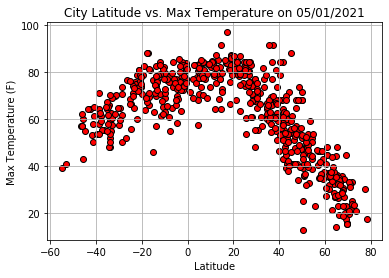

In [7]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature on {date}")
plt.savefig("../output_data/Lat_vs_temp_plot")

## Latitude vs. Humidity Plot
Looks at how the latitude of the city impacts the humidity percentage level

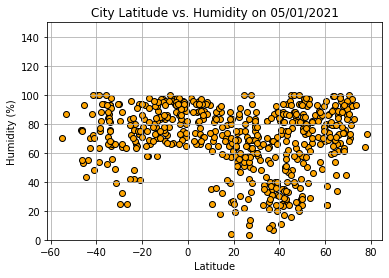

In [8]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity on {date}")
plt.savefig("../output_data/plot_lat_vs_hum")

## Latitude vs. Cloudiness Plot
Looks at how the latitude of the city impacts the percentage of cloudiness

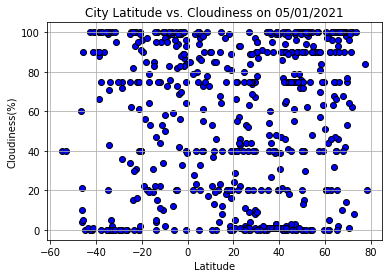

In [9]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness on {date}")
plt.savefig("../output_data/plot_lat_vs_clouds")

## Latitude vs. Wind Speed Plot
Looks at how the latitude of the city impacts the wind speed

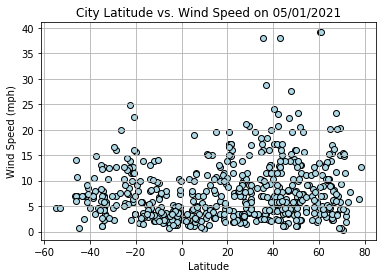

In [10]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "lightblue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed on {date}")
plt.savefig("../output_data/plot_lat_windspeed")

## Linear Regression

In [11]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8715812608456613
None


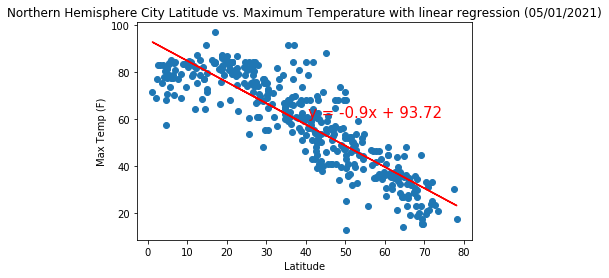

In [13]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere City Latitude vs. Maximum Temperature with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_nh_temp")

The linear regression of this plot shows a strong correlation between latitude and maximum temperatures in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6698378989079591
None


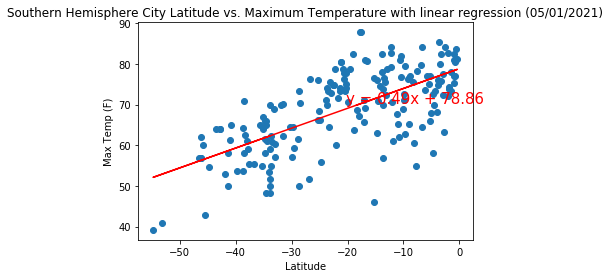

In [14]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere City Latitude vs. Maximum Temperature with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_sh_temp")

The linear regression of this plot shows a strong correlation between latitude and maximum temperatures in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06882983987418209
None


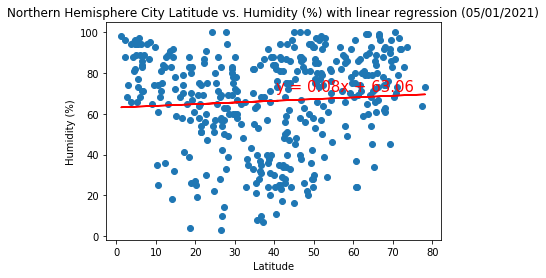

In [15]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity (%) with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_nh_hum")

The linear regression of this plot shows a very weak correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29408902497152817
None


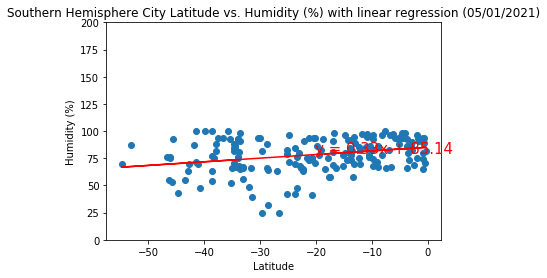

In [16]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity (%) with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_sh_hum")

The linear regression of this plot shows a very weak correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1709295169967191
None


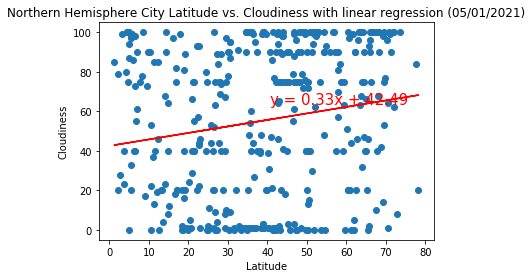

In [17]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_nh_cloud")

The linear regression of this plot shows a weak correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24778303409299157
None


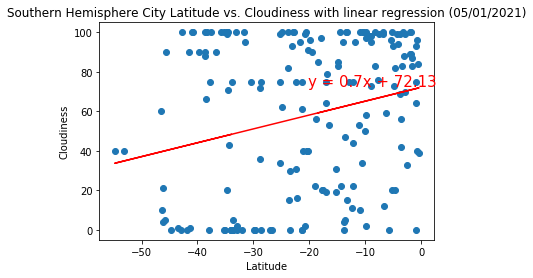

In [18]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_sh_cloud")

The linear regression of this plot shows a weak correlation between latitude and cloudiness in the southern hemisphere but stronger than the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12581332251982238
None


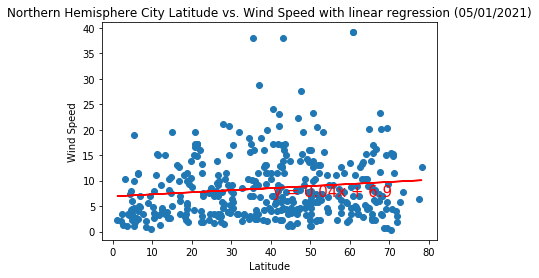

In [19]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed with linear regression ({date})")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_nh_wind")

The linear regression of this plot shows a weak correlation between latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24755404665214878
None


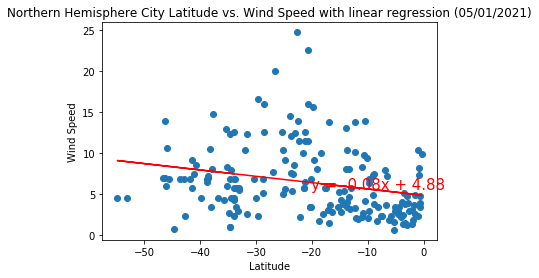

In [20]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed with linear regression ({date})")
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/reg_sh_wind")

The linear regression of this plot shows a very weak correlation between latitude and wind speed in the southern hemisphere.